## 习题 3.6

In [1]:
data <- read.table("./ex_3_6.meaningfulize.txt", header=TRUE)
data

FeIon,Dose,Retention
<chr>,<chr>,<dbl>
Fe3,high,0.71
Fe3,high,1.66
Fe3,high,2.01
Fe3,high,2.16
Fe3,high,2.42
Fe3,high,2.42
Fe3,high,2.56
Fe3,high,2.60
Fe3,high,3.31


In [2]:
attach(data)

### (1)

![题（1）](https://tva1.sinaimg.cn/large/008i3skNly1gr7f8iaibgj31lo06y41x.jpg)

首先，求出各组合观测值的样本均值、标准差。这里可以利用 aggregate 做分类汇总：

In [3]:
grouped_means <- aggregate(Retention, by=list(FeIon, Dose), FUN=mean)
grouped_sds  <- aggregate(Retention, by=list(FeIon, Dose), FUN=sd)

# 下面几行代码将结果整合到一个表格，方便查看：
grouped_means_sds <- cbind(grouped_means, grouped_sds["x"])
names(grouped_means_sds) <- c("FeIon", "Dose", "mean", "sd")
grouped_means_sds

FeIon,Dose,mean,sd
<chr>,<chr>,<dbl>,<dbl>
Fe2,high,5.936667,2.806778
Fe3,high,3.698889,2.030870
Fe2,low,12.639444,6.082089
Fe3,low,11.750000,7.028150
Fe2,mid,9.632222,6.691215
Fe3,mid,8.203889,5.447386


为方便观察，按 $Fe^{2+}$、$Fe^{3+}$ 并排比较：

In [4]:
(function() {
    `|` <- rep("|", 3);  # 这里为了显示效果取了一个 `|` 变量名，为避免后续麻烦，使用了函数包裹立即执行来隔离环境

    cbind(
        grouped_means_sds[grouped_means_sds$FeIon=="Fe2",], 
        `|`,
        grouped_means_sds[grouped_means_sds$FeIon=="Fe3",]
    )
})()

,FeIon,Dose,mean,sd,|,FeIon,Dose,mean,sd
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Fe2,high,5.936667,2.806778,|,Fe3,high,3.698889,2.030870
3,Fe2,low,12.639444,6.082089,|,Fe3,low,11.750000,7.028150
5,Fe2,mid,9.632222,6.691215,|,Fe3,mid,8.203889,5.447386


按剂量低、中、高并排比较：

In [5]:
(function() {
    `|` <- rep("|", 2);  # sep char: 这里为了显示效果取了一个 `|` 变量名，为避免后续麻烦，使用了函数包裹立即执行来隔离环境

    cbind(
        grouped_means_sds[grouped_means_sds$Dose=="low",], 
        `|`,
        grouped_means_sds[grouped_means_sds$Dose=="mid",],
        `|`,
        grouped_means_sds[grouped_means_sds$Dose=="high",]
    )
})()

,FeIon,Dose,mean,sd,|,FeIon,Dose,mean,sd,|,FeIon,Dose,mean,sd
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
3,Fe2,low,12.63944,6.082089,|,Fe2,mid,9.632222,6.691215,|,Fe2,high,5.936667,2.806778
4,Fe3,low,11.75000,7.028150,|,Fe3,mid,8.203889,5.447386,|,Fe3,high,3.698889,2.030870


可以画出箱线图来比较：

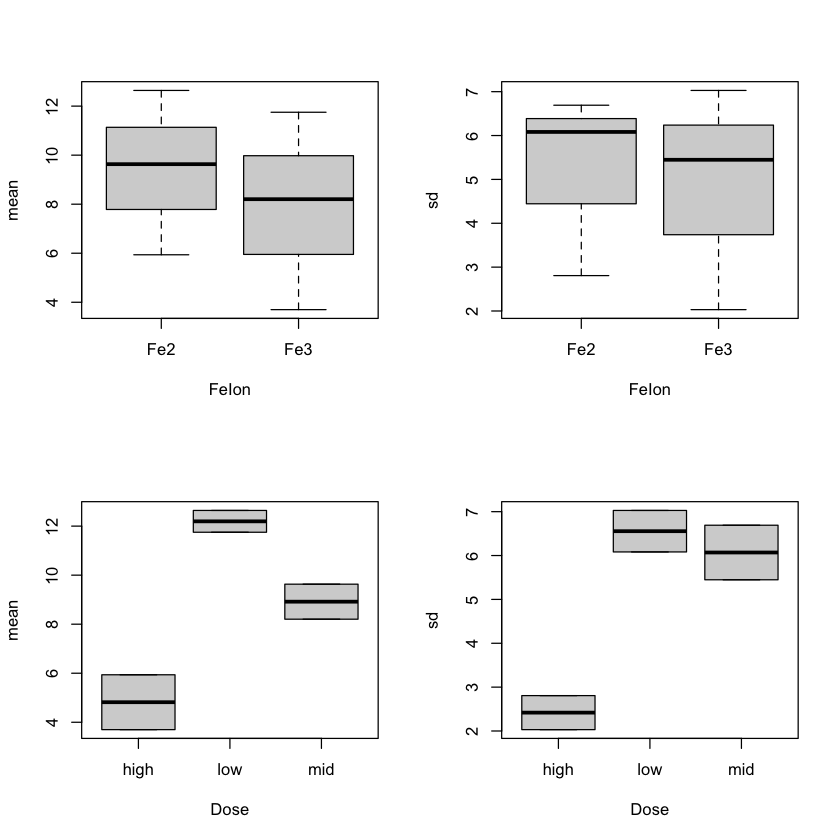

In [6]:
par(mfrow=c(2,2))

boxplot(`mean` ~ `FeIon`, data=grouped_means_sds)
boxplot(`sd` ~ `FeIon`, data=grouped_means_sds)
boxplot(`mean` ~ `Dose`, data=grouped_means_sds)
boxplot(`sd` ~ `Dose`, data=grouped_means_sds)

从比较结果来看，高剂量组标准差明显异于其他两组，认为假定误差的等方差性不太合理。
所以不能直接进行方差分析。

### (2)

![题（2）](https://tva1.sinaimg.cn/large/008i3skNly1gr7gc6aor7j61mu04iq4i02.jpg)

自然对数变换，把变换后的数据列叫做 `lnRetention`：

In [7]:
lnRetention <- log(Retention)
data <- cbind(data, lnRetention)

计算变换后的分组均值、标准差：

In [8]:
grouped_ln_means <- aggregate(lnRetention, by=list(FeIon, Dose), FUN=mean)
grouped_ln_sds   <- aggregate(lnRetention, by=list(FeIon, Dose), FUN=sd)

# 下面几行代码将结果整合到一个表格，方便查看：
grouped_ln_means_sds <- cbind(grouped_ln_means, grouped_ln_sds["x"])
names(grouped_ln_means_sds) <- c("FeIon", "Dose", "mean", "sd")
grouped_ln_means_sds

FeIon,Dose,mean,sd
<chr>,<chr>,<dbl>,<dbl>
Fe2,high,1.680129,0.4645464
Fe3,high,1.160924,0.5854773
Fe2,low,2.403389,0.5693701
Fe3,low,2.279981,0.6563113
Fe2,mid,2.090045,0.5736511
Fe3,mid,1.901225,0.6585116


作图比较：

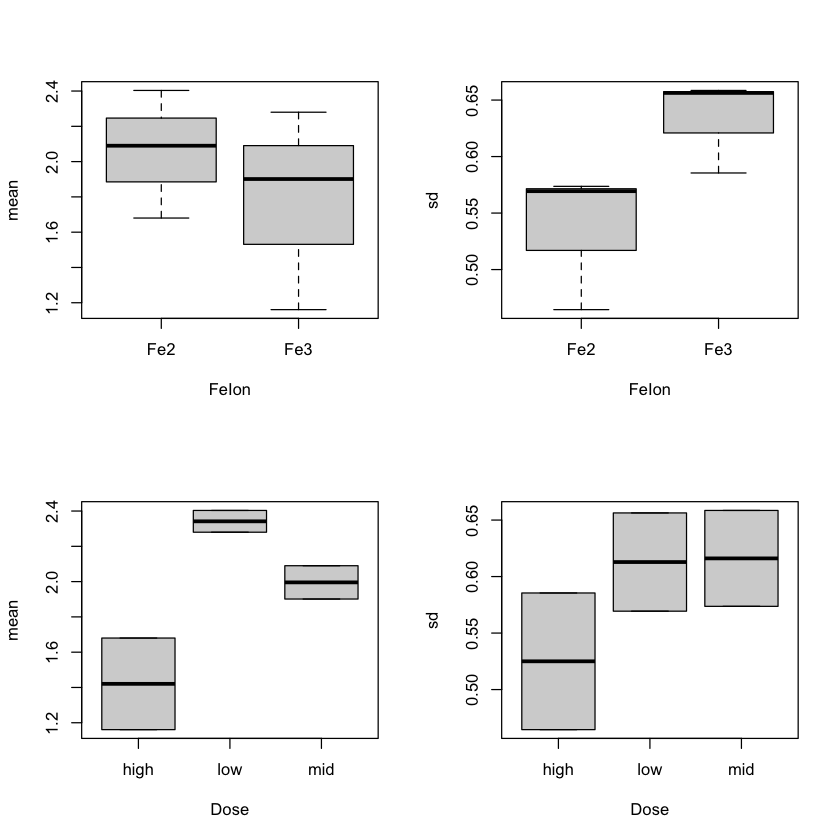

In [9]:
par(mfrow=c(2,2))

boxplot(`mean` ~ `FeIon`, data=grouped_ln_means_sds)
boxplot(`sd` ~ `FeIon`,   data=grouped_ln_means_sds)
boxplot(`mean` ~ `Dose`,  data=grouped_ln_means_sds)
boxplot(`sd` ~ `Dose`,    data=grouped_ln_means_sds)

可以看到，现在个组标准差趋于一致，各族间标准差差异不大。
可以利用变换之后的数据进行方差分析了。

### (3)

![题（3）](https://tva1.sinaimg.cn/large/008i3skNly1gr7grannygj31le050q51.jpg)

In [10]:
lnRetention.aov <- aov(lnRetention ~ FeIon + Dose + FeIon:Dose, data=data)
summary(lnRetention.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
FeIon         1   2.07   2.074   5.993   0.0161 *  
Dose          2  15.59   7.794  22.524 7.91e-09 ***
FeIon:Dose    2   0.81   0.405   1.171   0.3143    
Residuals   102  35.30   0.346                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

从结果中可以看出，在显著水平 $\alpha=0.05$ 下，
铁离子种类因素（$\textrm{Fe}^{2+}$、$\textrm{Fe}^{3+}$）和
剂量因素（剂量低、中、高）对存留量的影响均显著（检验 p 值都小于 $0.05$）。
即说明两种铁离子存留量是有显著差异的，不同剂量水平下存留量也是有显著差异的。

同时，可以看到在该水平下，交叉因子 (`FeIon:Dose`项）对存留量影响不显著（$p=0.3143>0.05$），认为两种铁离子存留量在不同剂量水平下可认为是相同的。

### (4)

![题（4）](https://tva1.sinaimg.cn/large/008i3skNly1gr7haazrvej31li050acr.jpg)

先求各因素在不同水平下的均值以及估计区间，可以复用 3.5 中封装的 mean_confin 函数：

In [11]:
mean_confin <- function(x, ...) {    # mean and confidence interval of x by t.test
    t.res <- t.test(x, ...)
    mean_val <- t.res$estimate[["mean of x"]]
    mean_conf.in <- t.res$conf.in
    
    res <- c(mean_val, mean_conf.in)
    names(res) <- c("mean", "conf.left", "conf.right")
    
    res  # ret
}

按离子：

In [12]:
(function() {
    Fe2 <- mean_confin(data[FeIon=="Fe2",]$lnRetention)
    Fe3 <- mean_confin(data[FeIon=="Fe3",]$lnRetention)
    rbind(Fe2, Fe3)
})()

,mean,conf.left,conf.right
Fe2,2.057854,1.892251,2.223458
Fe3,1.780710,1.568011,1.993409


按剂量：

In [13]:
(function() {
    Low  <- mean_confin(data[Dose=="low",]$lnRetention)
    Mid  <- mean_confin(data[Dose=="mid",]$lnRetention)
    High <- mean_confin(data[Dose=="high",]$lnRetention)
    rbind(Low, Mid, High)
})()

,mean,conf.left,conf.right
Low,2.341685,2.135709,2.547661
Mid,1.995635,1.787163,2.204107
High,1.420526,1.223052,1.618001


利用 DescTools 包，求 Bonferroni 同时置信区间：

In [14]:
# install.packages("DescTools")
library(DescTools)
PostHocTest(lnRetention.aov, method = "bonferroni")


  Posthoc multiple comparisons of means : Bonferroni 
    95% family-wise confidence level

$FeIon
              diff     lwr.ci      upr.ci   pval    
Fe3-Fe2 -0.2771441 -0.5016931 -0.05259515 0.0161 *  

$Dose
               diff     lwr.ci       upr.ci    pval    
low-high  0.9211588  0.5836659  1.258651627 4.6e-09 ***
mid-high  0.5751084  0.2376156  0.912601307 0.00021 ***
mid-low  -0.3460503 -0.6835432 -0.008557451 0.04251 *  

$`FeIon:Dose`
                        diff      lwr.ci     upr.ci    pval    
Fe3:high-Fe2:high -0.5192055 -1.10861287 0.07020194  0.1408    
Fe2:low-Fe2:high   0.7232596  0.13385220 1.31266701  0.0055 ** 
Fe3:low-Fe2:high   0.5998524  0.01044505 1.18925985  0.0425 *  
Fe2:mid-Fe2:high   0.4099156 -0.17949182 0.99932299  0.5859    
Fe3:mid-Fe2:high   0.2210958 -0.36831157 0.81050323  1.0000    
Fe2:low-Fe3:high   1.2424651  0.65305767 1.83187247 9.7e-08 ***
Fe3:low-Fe3:high   1.1190579  0.52965051 1.70846531 1.7e-06 ***
Fe2:mid-Fe3:high   0.9291210  0.3397